# Исследование объявлений о продаже квартир

На основании данных сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет - необходимо определить рыночную стоимость объектов недвижимости.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Необходимо установить параметры, которые влияют на стоимость объетов недвижимости.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-площади,-цены,-числа-комнат,-высоты-потолков" data-toc-modified-id="Изучение-площади,-цены,-числа-комнат,-высоты-потолков-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучение площади, цены, числа комнат, высоты потолков</a></span></li><li><span><a href="#Изучение-времени-продажи-квартиры" data-toc-modified-id="Изучение-времени-продажи-квартиры-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучение времени продажи квартиры</a></span></li><li><span><a href="#Исключение-редких-и-выбивающихся-значений" data-toc-modified-id="Исключение-редких-и-выбивающихся-значений-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Исключение редких и выбивающихся значений</a></span></li><li><span><a href="#Факторы-влияющие-на-стоимость-квартиры" data-toc-modified-id="Факторы-влияющие-на-стоимость-квартиры-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Факторы влияющие на стоимость квартиры</a></span></li><li><span><a href="#Анализ-по-10-населенным-пунктам" data-toc-modified-id="Анализ-по-10-населенным-пунктам-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Анализ по 10 населенным пунктам</a></span></li><li><span><a href="#Анализ-квартир-в-Санкт-Петербурге" data-toc-modified-id="Анализ-квартир-в-Санкт-Петербурге-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Анализ квартир в Санкт-Петербурге</a></span></li><li><span><a href="#Анализ-квартир-в-центре-Санкт-Петербурга" data-toc-modified-id="Анализ-квартир-в-центре-Санкт-Петербурга-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Анализ квартир в центре Санкт-Петербурга</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Изучение данных из файла

Импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Прочитаем файл с данными

In [2]:
try:
    data = pd.read_csv('real_estate_data.csv', sep ='\t')    #загрузка файла по локальному пути
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep ='\t') #загрузка файла по серверному пути

pd.options.display.max_columns = None
pd.options.display.max_rows = None
data.head(10)     # получение первых 10 строк таблицы

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Описание данных
airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
balcony — число балконов
ceiling_height — высота потолков (м)
cityCenters_nearest — расстояние до центра города (м)
days_exposition — сколько дней было размещено объявление (от публикации до снятия)
first_day_exposition — дата публикации
floor — этаж
floors_total — всего этажей в доме
is_apartment — апартаменты (булев тип)
kitchen_area — площадь кухни в квадратных метрах (м²)
last_price — цена на момент снятия с публикации
living_area — жилая площадь в квадратных метрах (м²)
locality_name — название населённого пункта
open_plan — свободная планировка (булев тип)
parks_around3000 — число парков в радиусе 3 км
parks_nearest — расстояние до ближайшего парка (м)
ponds_around3000 — число водоёмов в радиусе 3 км
ponds_nearest — расстояние до ближайшего водоёма (м)
rooms — число комнат
studio — квартира-студия (булев тип)
total_area — площадь квартиры в квадратных метрах (м²)
total_images — число фотографий квартиры в объявлении

Изучим общую информацию о таблице

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В названии столбца cityCenters_nearest строчные буквы сочетаются с прописными. Необходимо исправить стиль в заголовках столбца.
Названия прочих столбцов таблицы соответствуют общим правилам стиля и не требуют изменений. 
В столбцах разичается количество значений, что свидетельствует о наличии пропущенных значений. 

Посчитаем пропущенные значения

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропущенные значения есть во многих столбцах. Далее рассмотрим какие можно заполнить и как. Посмотрим на основные характеристики данных. 

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


В данных присутустуют аномальные значения например, потолки по 100 м и квартиры площадью 900 кв.м. Как с ними быть решим далее.

### Вывод

При обзоре данных обнаружено, что во многих столбцах присутствуют пропущенные значения, в названиях столбцов есть некорректрные названия, а также есть аномальные значения.

## Предобработка данных

Для начала исправим назввания столбцов

In [6]:
data.columns # перечень названий столбцов таблицы data

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Приведем названия в соответствие с хорошим стилем - запищем несколько слов в названии в «змеином_регистре».

Переименуем столбцы следующим образом:
* `'cityCenters_nearest'` → `'city_сenters_nearest'`;

In [7]:
data = data.rename(columns = {'cityCenters_nearest':'city_сenters_nearest'}) # переименование столбцов

Проверим результат. Ещё раз выведим на экран названия столбцов:

In [8]:
data.columns # проверка результатов - перечень названий столбцов

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_сenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Расмотрим столбец is_apartment. В данном столбце содержится информация о том является квартира апортаментами или нет, соответственно тип данных в данном столбце должен быть булевым (что соответствует условию). Логично предположить что пропуски в данном столбце люди допускали сознательно просто не понимая значения данного вопроса, поэтому пропущенные значения можно заменить на "Ложь". Так как если квартира является апортаментами владельцы об этом однозначно знают и заполнят данный столбец.     

In [9]:
# посчитаем пропущенные значения в столбце
data['is_apartment'].isna().sum() 

20924

In [10]:
data['is_apartment'].value_counts() # выведем список уникальных значений до изменений

False    2725
True       50
Name: is_apartment, dtype: int64

In [11]:
# заполним пропуски значением False
data['is_apartment'] = data['is_apartment'].fillna(False)

In [12]:
data['is_apartment'].value_counts() # выведем список уникальных значений после изменений

False    23649
True        50
Name: is_apartment, dtype: int64

In [13]:
# изменим тип данныз в столбце на булев
data['is_apartment'] = data['is_apartment'].astype('bool') 
# выведем список уникальных значений после изменений
data['is_apartment'].value_counts() 

False    23649
True        50
Name: is_apartment, dtype: int64

Расмотрим столбец balcony, который содержит информация о количестве балконов.

In [14]:
data['balcony'].value_counts() # выведем список уникальных значений до изменений

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Логично предполижить,что если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0.

In [15]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].value_counts()

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

Заполним значение жилой площади living_area и площади кухни kitchen_area медианным значением для среза данных исходя из наличия балконов и общей площади

In [16]:
data['total_area'].median() #медиана общей площади

52.0

In [17]:
data['total_area'].mean() # среднее общей площади

60.34865099793241

На основании диапазонов, указанных ниже, создадим столбец total_area_category с категориями:
0–20 — '<20';
20–40 — '>20';
40–65 — '>40';
65–100 — '>65';
100-200 — '>100'
свыше 200 - >200.

Напишем функцию которая будет возвращать нужную категорию в соотвествии со значением общей площади.

In [18]:
def total_area_category(total_area):
    if 0 < total_area <= 20:
        return '<20'
    elif 20 < total_area <= 40:
        return '>20'
    elif 40 < total_area <= 65:
        return '>40'
    elif 65 < total_area <= 100:
        return '>65'
    elif 100 < total_area <= 200:
        return '>100'
    elif total_area > 200:
        return '>200'
    
total_area_category(65)

'>40'

Добавим в датафрейм столбец total_area_category с категориями. Для этого применим созданную функцию.

In [19]:
data['total_area_category'] = data['total_area'].apply(total_area_category)
data.head()      # выведем первые 5 строк

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,>100
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,>40
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,>40
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,>100
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,>65


Проверим как заполнились данные в новом столбце

In [20]:
data['total_area_category'].value_counts()

>40     10712
>20      6007
>65      5109
>100     1609
>200      227
<20        35
Name: total_area_category, dtype: int64

Сгруппируем данные по категориям с общей площадью и сравним средние и медианные значения жилой площади 

In [21]:
data.pivot_table(index='total_area_category', values='living_area', aggfunc=['mean', 'median'])

,mean,median
,living_area,living_area
total_area_category,,
<20,13.349583,13.5
>100,75.185495,72.2
>20,17.372841,17.2
>200,165.196935,159.5
>40,29.802933,30.0
>65,46.318309,46.0


<AxesSubplot:ylabel='Frequency'>

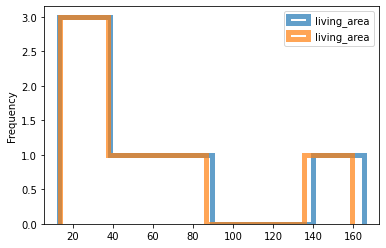

In [22]:
ax = (data.pivot_table(index='total_area_category', values='living_area', aggfunc=['mean'])
.plot(kind='hist', y ='mean', histtype='step', bins=6, linewidth=5, alpha=0.7)
)
(data.pivot_table(index='total_area_category', values='living_area', aggfunc=['median'])
.plot(kind='hist', y ='median', histtype='step', bins=6, linewidth=5, ax = ax, alpha=0.7)
)

По графику видно что среднее и медианное значения не сильно отличаются. Заполним пропуски медианными значениями.
Сгруппируем данные по категориям общей площади и количеству балконов.

In [23]:
data.groupby(by=['total_area_category', 'balcony'])['living_area', 'kitchen_area'].count() 

/tmp/ipykernel_68/3308236526.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby(by=['total_area_category', 'balcony'])['living_area', 'kitchen_area'].count()


living_area  kitchen_area
total_area_category balcony                           
<20                 0.0               23             7
                    1.0                1             0
                    2.0                0             0
>100                0.0             1035          1031
                    1.0              214           215
                    2.0              121           133
                    3.0               15            16
                    4.0               31            34
                    5.0               40            44
>20                 0.0             3488          3263
                    1.0             1098          1074
                    2.0              961           861
                    3.0                2             2
                    4.0                5             5
                    5.0                4             5
>200                0.0              146           147
                    1.0               40            38
                    2.0                7             6
                    3.0                2             3
                    4.0                2             2
                    5.0                2             2
>40                 0.0             5981          5925
                    1.0             2036          2040
                    2.0             1633          1648
                    3.0               21            23
                    4.0               69            68
                    5.0              101           106
>65                 0.0             3021          3000
                    1.0              668           677
                    2.0              789           804
                    3.0               35            34
                    4.0               69            68
                    5.0              136           140

По таблице выше видно, что при такой группировке в некоторых категориях отсутствуют значения или их очень мало и заполнить пропуски в таком случае не представляется возможным. Так как при группировке только по категориям общей площади медианное и среднее значения близки, то можно заполнить пропуски медианным значением при группировке по категориям общей площади. Заполним пропуски в столбцах living_area и kitchen_area. 

In [24]:
# рассчитаем медианы для жилой площади по категориям общей площади
data_transformed_living = data.groupby('total_area_category')['living_area'].transform('median')

In [25]:
# заполним пропуски медианным значением
data['living_area'] = data['living_area'].fillna(data_transformed_living)

In [26]:
# просчитаем пропуски после заполнения
data['living_area'].isna().sum()

0

Аналогичным образом заполним пропуски в столбце с данными о площади кухни kitchen_area	

In [27]:
# рассчитаем медианы для площади кухни по категориям общей площади
data_transformed_kitchen = data.groupby('total_area_category')['kitchen_area'].transform('median')

In [28]:
# заполним пропуски медианным значением
data['kitchen_area'] = data['kitchen_area'].fillna(data_transformed_kitchen)

In [29]:
# просчитаем пропуски после заполнения
data['kitchen_area'].isna().sum()

0

Рассмотрим столбец с данными о высоте потолка ceiling_height

In [30]:
data['ceiling_height'].min(), data['ceiling_height'].max()

(1.0, 100.0)

Минимальное и максимальное значения выглядят недостоверными- потолок высотой в 1 м слишком низкий для квартиры, а потолок в 100 м - слишком высокий. Пока нисего не будем делать с данными значениями.

In [31]:
data['ceiling_height'].isna().sum()

9195

Пропущенных значений в данном столбце 9195. Однако хорошего варианта заполнения данных пропусков предложить не могу, поэтому оставим их. 

Рассмотрим столбец с данными о названии населённого пункта locality_name

In [32]:
data['locality_name'].value_counts()

Санкт-Петербург                                            15721
посёлок Мурино                                               522
посёлок Шушары                                               440
Всеволожск                                                   398
Пушкин                                                       369
Колпино                                                      338
посёлок Парголово                                            327
Гатчина                                                      307
деревня Кудрово                                              299
Выборг                                                       237
Петергоф                                                     201
Сестрорецк                                                   183
Красное Село                                                 178
Кудрово                                                      173
деревня Новое Девяткино                                      144
Сертолово                

При просмотре данных из этого столбца видно что он содержит неявные дубликаты, например слова "поселок" и "посёлок". Данные неявные дубликаты необходимо устранить,для этого заменим слово 'посёлок' на 'поселок'. Также в данном столбце содержатся такие данные как "посёлок Мурино" и "Мурино", данные населенные пункты хоть и называются одинаково, но могут разными, поэтому подобные случаи не будем считать дубликатами.

In [33]:
# посчитаем количество уникальных значений до изменения
len(data['locality_name'].unique())

365

In [34]:
# произведем замену слово 'посёлок' на 'поселок'
data['locality_name'] = data['locality_name'].str.replace('посёлок', 'поселок')
# посчитаем количество уникальных значений после изменения
len(data['locality_name'].unique())

331

По результату произведенных действий количество уникальных значений в данной столбце сократилось до 331.

Рассмотрим столбцы с числом парков в радиусе 3 км parks_around3000 и числом водоёмов в радиусе 3 км ponds_around3000. Если в данных столбцах пропущены значения, то скорее всего это означает, что в указанном радиусе не парков и водоемов и пропуски в таком случае можно заменить на 0.

In [35]:
# посчитаем пропущенные значения
data['parks_around3000'].isna().sum()

5518

In [36]:
# посчитаем пропущенные значения в parks_nearest при условии пропуска в parks_around3000
data[data['parks_around3000'].isna()]['parks_nearest'].isna().sum()

5518

In [37]:
data[data['parks_nearest'] > 3000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category
1590,3,7500000.0,70.0,2017-07-11T00:00:00,2,NaN,18.0,37.0,13,False,False,False,10.0,0.0,Санкт-Петербург,14878.0,9791.0,0.0,3064.0,1.0,264.0,4.0,>65
10959,9,3000000.0,31.1,2017-03-21T00:00:00,1,NaN,5.0,17.7,2,False,False,False,5.5,0.0,Санкт-Петербург,14821.0,9734.0,0.0,3190.0,1.0,431.0,234.0,>20
19208,17,14950000.0,187.0,2017-10-12T00:00:00,5,3.0,2.0,80.0,2,False,False,False,17.0,1.0,Санкт-Петербург,36805.0,8656.0,0.0,3013.0,3.0,537.0,49.0,>100
19430,9,3900000.0,30.5,2018-02-22T00:00:00,1,2.6,5.0,16.5,1,False,False,False,5.5,0.0,Санкт-Петербург,14821.0,9734.0,0.0,3190.0,1.0,431.0,176.0,>20


Таким образом, количество пропусков значений в parks_nearest при условии пропуска в parks_around3000 совпадает с количеством пропусков в parks_around3000, а при значении в столбце parks_nearest больше 3000 в столбце parks_around3000 значение 0. Заменяем пропуски в parks_around3000 на 0.    

Аналогичным образом проанализируем столбцы ponds_around3000 и ponds_nearest

In [38]:
# посчитаем пропущенные значения в ponds_nearest при условии пропуска в ponds_around3000
data[data['ponds_around3000'].isna()]['ponds_nearest'].isna().sum()

5518

In [39]:
# посчитаем пропущенные значения
data['ponds_around3000'].isna().sum()

5518

Количество пропусков значений в ponds_nearest при условии пропуска в ponds_around3000 совпадает с количеством пропусков в ponds_around3000, а при значении в столбце ponds_nearest больше 3000 в столбце parks_around3000 значение 0. Заменяем пропуски в ponds_around3000 на 0.

In [40]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

In [41]:
# посчитаем пропущенные значения после заполнения
data['parks_around3000'].isna().sum()

0

In [42]:
# посчитаем пропущенные значения после заполнения
data['ponds_around3000'].isna().sum()

0

Рассмотрим столбец с информацией о дате публикации first_day_exposition. В данном столбце содержится дата, поэтому приведем данные к нужному формату.

In [43]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Выведем общую информацию после произведенных изменений.

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

### Вывод

В ходе предобработки данных частично заполнены пропуски в столбцах где можно предположить логичное заполнение, также изменен тип данных на корректный. 

## Расчёты и добавление результатов в таблицу

Добавим в датасет информацию о стоимости 1 квадратного метра. Для этого напишем функцию с помощью которой посчитаем стоимость квадратного метра.

In [45]:
def price_metr(row):
    price = row['last_price']
    area = row['total_area']
    return price / area



In [46]:
row = pd.Series(data= [500000, 1000], index= ['last_price', 'total_area'])
row

last_price    500000
total_area      1000
dtype: int64

In [47]:
price_metr(row)

500.0

Добавим столбец с информацией о стоимости квдратного метра в таблицу

In [48]:
data['price_metr'] = data.apply(price_metr, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category,price_metr
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,>100,120370.370370
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,False,False,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,>40,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,>40,92785.714286
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,72.2,9,False,False,False,16.0,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,>100,408176.100629
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,>65,100000.000000


Добавим в таблицу столбцы с информацией о дне недели, месяце и годе публикации объявления

In [49]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category,price_metr,weekday_exposition,month_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,>100,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,False,False,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,>40,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,>40,92785.714286,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,72.2,9,False,False,False,16.0,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,>100,408176.100629,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,>65,100000.000000,1,6,2018


Добавим в таблицу столбец с информацией об этажах квартиры: варианты — первый, последний, другой


 Для этого напишем функцию.


In [50]:
def floors_category(row):
    floor = row['floor']
    end_floor = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == end_floor:
        return 'последний'
    else:
        return 'другой'

row = pd.Series(data= [2, 10], index= ['floor', 'floors_total'])
floors_category(row)

'другой'

Добавим в таблицу столбец floors_category

In [51]:
data['floors_category'] = data.apply(floors_category, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category,price_metr,weekday_exposition,month_exposition,year_exposition,floors_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,>100,120370.370370,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,False,False,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,>40,82920.792079,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,>40,92785.714286,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,72.2,9,False,False,False,16.0,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,>100,408176.100629,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,>65,100000.000000,1,6,2018,другой


Добавим в таблицу столбцы с информацией о соотношении жилой и общей площади, а также отношении площади кухни к общей.

In [52]:
data['ratio_living_area'] = data['living_area'] / data['total_area']
data['ratio_kitchen_area'] = data['kitchen_area'] / data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category,price_metr,weekday_exposition,month_exposition,year_exposition,floors_category,ratio_living_area,ratio_kitchen_area
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,>100,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,False,False,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,>40,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,>40,92785.714286,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,72.2,9,False,False,False,16.0,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,>100,408176.100629,4,7,2015,другой,0.454088,0.100629
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,>65,100000.000000,1,6,2018,другой,0.320000,0.410000


Выведем общую информацию после произведенных изменений.

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

### Вывод

В данном разделе в табдицу добавлены следующие значения: цена квадратного метра; день недели, месяц и год публикации объявления; этаж квартиры; варианты — первый, последний, другой; соотношение жилой и общей площади, а также отношение площади кухни к общей. 

## Исследовательский анализ данных

### Изучение площади, цены, числа комнат, высоты потолков

Изучим следующие параметры: площадь, цена, число комнат, высота потолков и постройте гистограммы для каждого параметра

<AxesSubplot:>

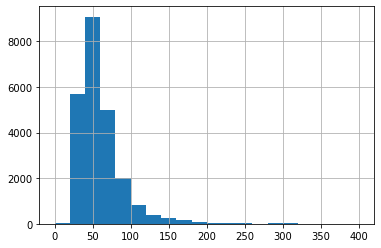

In [54]:
# построим гистргамму для общей площади
data['total_area'].hist(bins=20, range=(0, 400))

In [55]:
# выведем минимальное и максимальное значения
data['total_area'].min(), data['total_area'].max()

(12.0, 900.0)

<AxesSubplot:>

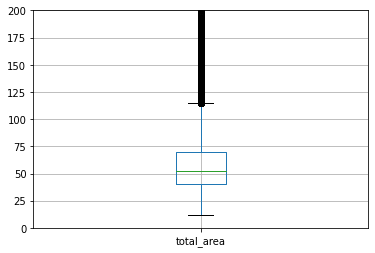

In [56]:
# построим диаграмму размаха
plt.ylim(0, 200)
data.boxplot('total_area')

По построенным диаграммам видно, что после площади в 200 кв.м количесво объявлений очень низкое, также как и при малелькой площади до 20 кв.м. Медианное значение чуть более 50. Основное количество объявлений приходится на квартиры площадью от 25 до 75 кв.м

<AxesSubplot:>

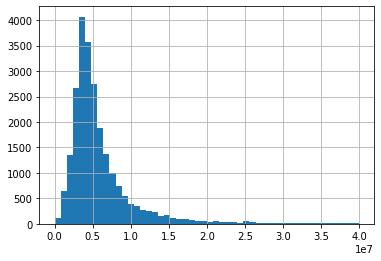

In [57]:
# построим гистргамму для цены на момент снятия с публикации
data['last_price'].hist(bins=50, range=(0, 40000000))

<AxesSubplot:>

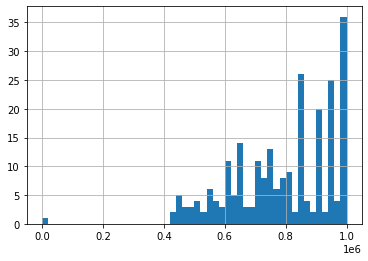

In [58]:
# приблизим гистргамму 
data['last_price'].hist(bins=50, range=(0, 1000000))

In [59]:
# выведем минимальное и максимальное значения
data['last_price'].min(), data['last_price'].max()

(12190.0, 763000000.0)

<AxesSubplot:>

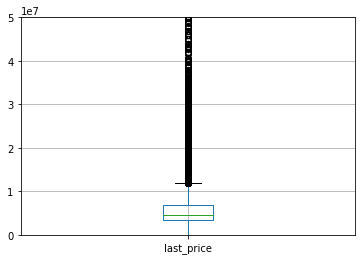

In [60]:
# построим диаграмму размаха
plt.ylim(0, 50000000)
data.boxplot('last_price')

По построенным диаграммам видно, что после цены в 4 млн. количесво объявлений очень низкое, также как и при малелькой цене до 1 млн. Цена в 12190 руб. явно не соответствует реальности. Медианное значение в районе 5 млн. Основное количество объявлений приходится на квартиры стоимостью от 3 до 8 млн.

<AxesSubplot:>

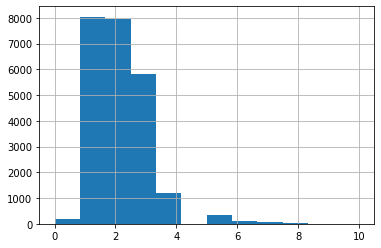

In [61]:
# построим гистргамму для количества комнат
data['rooms'].hist(bins=12, range=(0, 10))

In [62]:
# выведем минимальное и максимальное значения
data['rooms'].min(), data['rooms'].max()

(0, 19)

<AxesSubplot:>

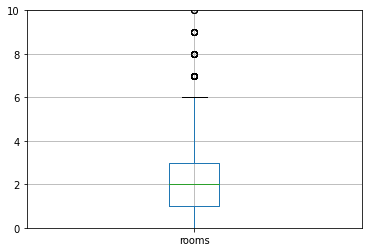

In [63]:
# построим диаграмму размаха
plt.ylim(0, 10)
data.boxplot('rooms')

По построенным диаграммам видно, что на квартиры с количесвом комнат более 4 объявлений значительно меньше, также как и при количестве комнат равном 0, что возможно если объявление о квартире студии. Медианное значение соответствует 2 комнатам. Основное количество объявлений приходится на квартиры с количеством комнат от 1 до 3.

<AxesSubplot:>

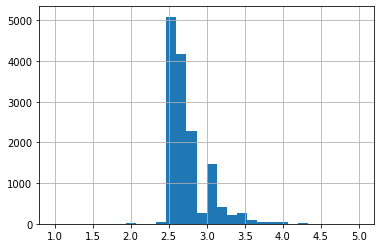

In [64]:
# построим гистргамму для высоты потолков
data['ceiling_height'].hist(bins=30, range=(1, 5))

In [65]:
# выведем минимальное и максимальное значения
data['ceiling_height'].min(), data['ceiling_height'].max()

(1.0, 100.0)

<AxesSubplot:>

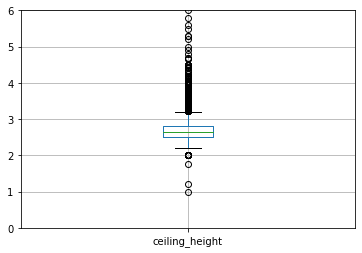

In [66]:
# построим диаграмму размаха
plt.ylim(0, 6)
data.boxplot('ceiling_height')

По построенным диаграммам видно, что на квартиры с высотой потолков более 3,5 м объявлений значительно меньше, также как и при высоте потолков до 2.5 м. Медианное значение в районе 2.7 м. Основное количество объявлений приходится на квартиры с высотой потолка  от 2,5 до 3 м.

### Изучение времени продажи квартиры

Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго

<AxesSubplot:>

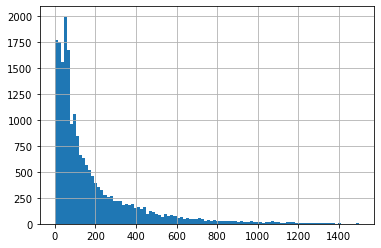

In [67]:
# построим гистргамму для количества дней на которе было размещено объявление (от публикации до снятия)
data['days_exposition'].hist(bins=100, range=(0,1500))

<AxesSubplot:>

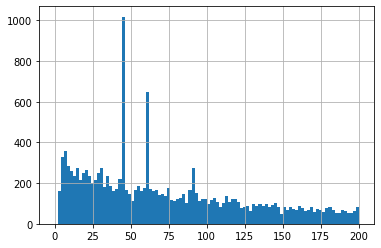

In [68]:
# рассмотрим данные поближе
data['days_exposition'].hist(bins=100, range=(0,200))

<AxesSubplot:>

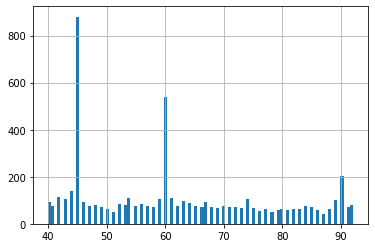

In [69]:
# рассмотрим данные поближе
data['days_exposition'].hist(bins=100, range=(40,92))

In [70]:
# выведем минимальное и максимальное значения
print(data['days_exposition'].min(), data['days_exposition'].max())

1.0 1580.0


In [71]:
# выведем медианное и среднее значения
print(data['days_exposition'].median(), data['days_exposition'].mean())

95.0 180.88863436982163


Среднее количество дней на которое было размещено объявление составляет 181 день, медианное количество дней на которое было размещено объявление составляет 95 дней.

<AxesSubplot:>

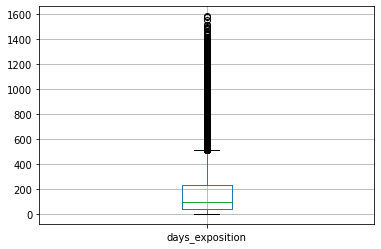

In [72]:
# построим диаграмму размаха
data.boxplot('days_exposition')

<AxesSubplot:>

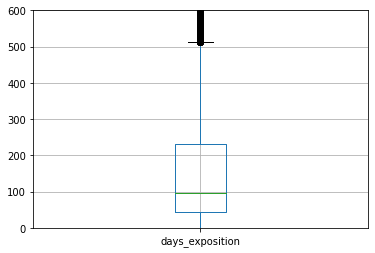

In [73]:
# рассмотрим данные поближе
plt.ylim(0, 600)
data.boxplot('days_exposition')

Основная часть значений находится в пределах от 50 до 220 дней. По гистрамме видно, что с увеличением количества дней количество объявлений сокращается. Сильно выбивающихся значений нет. Но при приближении гистаграммы видно что при 45, 60 и 90 днях наблюдаются резкое увеличение количества снятых объявлений (приблизительно в 9, 5 и 2,5 раза соответственно). Можно предположить что это связано с особенностями работы риелторов или особенностями работы площадки на которой эти объявления размещены. Таким образом, можно считать что продажи осуществились очень быстро в случае если объявление было размещено менее 45 дней, а необычно долго в случае размещения обявления более 220 дней.

### Исключение редких и выбивающихся значений

 Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

По результатам произведенного анализа исключим следующие значения: объявления с количеством комнат более 8, с общей площадью площадью менее 20 кв.м и более 300, с ценой на момент снятия с публикации менее 400000 и более 40000000 и высотой потолка  менее 2 м и более 4,5 м и кличеством дней на которое было размещено объявление менее 510. 

In [74]:
data_filtered = data.query('rooms <= 8 and 20 <= total_area<= 300 and 400000 < last_price < 40000000 and 2 < ceiling_height < 4.5 and days_exposition <= 510')

In [75]:
data_filtered.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_metr,weekday_exposition,month_exposition,year_exposition,ratio_living_area,ratio_kitchen_area
count,10812.000000,1.081200e+04,10812.000000,10812.000000,10812.000000,10808.000000,10812.000000,10812.000000,10812.000000,10812.000000,8664.000000,8679.000000,10812.000000,3837.000000,10812.000000,4174.000000,10812.000000,10812.000000,10812.000000,10812.000000,10812.000000,10812.000000,10812.000000
mean,10.118202,5.746806e+06,57.472857,2.026915,2.705354,10.413768,33.120279,5.723455,10.059248,0.697836,29027.171630,14404.017744,0.486404,474.931457,0.593507,531.396263,131.695801,97547.109056,2.527007,6.569460,2017.495838,0.567848,0.187291
std,5.576014,4.138397e+06,26.642316,0.985472,0.244053,6.258930,17.653098,4.662458,4.857594,1.004837,12845.788609,8588.838845,0.754048,316.731701,0.882437,279.806084,122.458787,34645.393292,1.785125,3.504042,0.815106,0.100697,0.070308
min,0.000000,4.500000e+05,20.000000,0.000000,2.200000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,208.000000,0.000000,3.000000,0.000000,16.000000,1.000000,9615.384615,0.000000,1.000000,2015.000000,0.038462,0.025381
25%,6.000000,3.500000e+06,40.000000,1.000000,2.500000,5.000000,18.700000,2.000000,7.000000,0.000000,18375.250000,9815.000000,0.000000,283.000000,0.000000,305.000000,41.000000,78068.808439,1.000000,3.000000,2017.000000,0.500000,0.135802
50%,10.000000,4.600000e+06,51.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,27123.500000,13170.000000,0.000000,450.000000,0.000000,523.000000,89.000000,95384.615385,2.000000,7.000000,2018.000000,0.570913,0.173275
75%,14.000000,6.500000e+06,67.400000,3.000000,2.780000,14.000000,41.900000,8.000000,11.200000,1.000000,37412.000000,16134.000000,1.000000,603.000000,1.000000,748.000000,189.000000,113333.333333,4.000000,10.000000,2018.000000,0.638298,0.229213
max,50.000000,3.990000e+07,297.500000,8.000000,4.400000,60.000000,211.000000,27.000000,65.000000,5.000000,83758.000000,64857.000000,3.000000,3190.000000,3.000000,1344.000000,510.000000,552000.000000,6.000000,12.000000,2019.000000,0.983447,0.723270


In [76]:
# посмотрим на размер полученной таблицы 
data_filtered.shape

(10812, 30)

In [77]:
# посмотрим на размер перврначальной таблицы 
data.shape

(23699, 30)

Пссмотрим общую информацию о полученной таблице

In [78]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10812 entries, 4 to 23693
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          10812 non-null  int64         
 1   last_price            10812 non-null  float64       
 2   total_area            10812 non-null  float64       
 3   first_day_exposition  10812 non-null  datetime64[ns]
 4   rooms                 10812 non-null  int64         
 5   ceiling_height        10812 non-null  float64       
 6   floors_total          10808 non-null  float64       
 7   living_area           10812 non-null  float64       
 8   floor                 10812 non-null  int64         
 9   is_apartment          10812 non-null  bool          
 10  studio                10812 non-null  bool          
 11  open_plan             10812 non-null  bool          
 12  kitchen_area          10812 non-null  float64       
 13  balcony         

### Факторы влияющие на стоимость квартиры 

Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

На основе полученной после удаления выбивающихся значений таблицы проведем анализ факторов которые влияют на стоимость квартиры. Создадаим датафрейм data_filtered1 который будет содержать данные о цене, площади, количестве комнат, удалённости от центра, этажности и дате размещения.

In [79]:
data_filtered1 = data_filtered.loc[:, ['last_price', 'total_area', 'rooms', 'city_сenters_nearest', 
                                       'floors_category', 'weekday_exposition', 'month_exposition', 'year_exposition']]

In [80]:
data_filtered1.head(10)

,last_price,total_area,rooms,city_сenters_nearest,floors_category,weekday_exposition,month_exposition,year_exposition
4,10000000.0,100.0,2,8098.0,другой,1,6,2018
9,5400000.0,61.0,3,15008.0,другой,6,2,2017
10,5050000.0,39.6,1,13878.0,другой,3,11,2017
13,3550000.0,42.8,2,33058.0,последний,5,7,2017
16,6700000.0,82.0,3,10698.0,первый,3,11,2017
18,3250000.0,31.0,1,10842.0,другой,4,1,2017
19,14200000.0,121.0,3,12843.0,другой,2,1,2019
20,6120000.0,80.0,3,19311.0,другой,3,9,2017
22,5000000.0,58.0,2,NaN,другой,0,4,2017
25,6800000.0,76.0,2,14640.0,другой,3,10,2015


При помощи цикла построим графики зависимости стоимости квартиры от различных факторов.

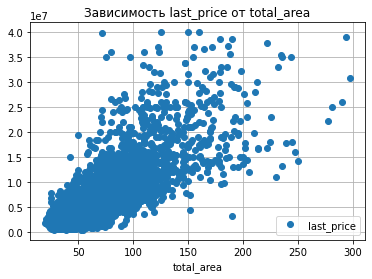

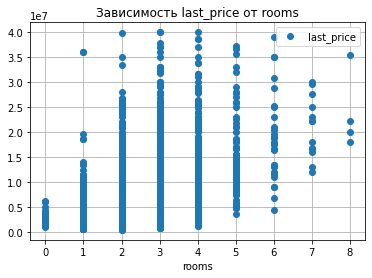

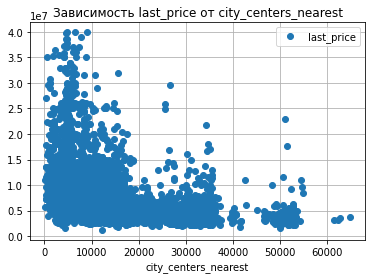

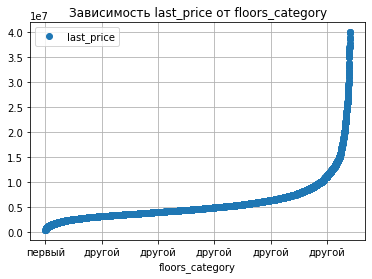

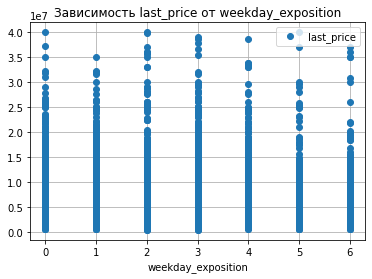

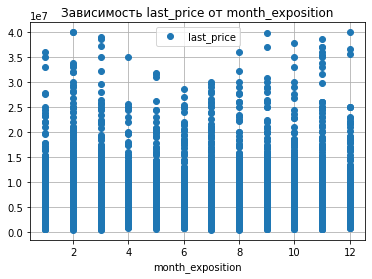

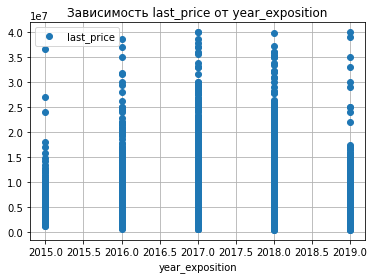

In [81]:
for arg in ['total_area', 'rooms', 'city_сenters_nearest', 'floors_category', 'weekday_exposition',
            'month_exposition', 'year_exposition']:
    (data_filtered1.sort_values('last_price')
    .plot(style='o', x=arg, y='last_price', grid= True, title=(f'Зависимость last_price от {arg}'))
    )

По получившимся графикам видно, что с увеличением площади цена растет, при маленькой площади наблюдается более строгая прямая зависимость, а с увеличением площади разброс в цене растет. С увеличением количества комнат также увеличивается стоимость, данных с количеством комнат более 5 значительно меньше, поэтому увеличение цены прератилось. Также количество комнат связано с общей площадью квартиры. Чем ближе к центру, тем больше разброс по цене. стоимость в зависимости от дня недели не сильно изменяется, единственное что можно заметить, что в выходные стоимость ниже. По месяцам стоимость снижается в апреле-июне. В 2015 году большая часть объявлений была по меньшей цене, чем в последующие годы. В 2019 стоимость большинства объявлений уменьшилась, но возможно за этот год просто менбше данных, так как объявления по стоимости 2018 года присутствуют.  

Добавим графики изменения стоимости по категориям этажности.

floors_category
другой       AxesSubplot(0.125,0.125;0.775x0.755)
первый       AxesSubplot(0.125,0.125;0.775x0.755)
последний    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

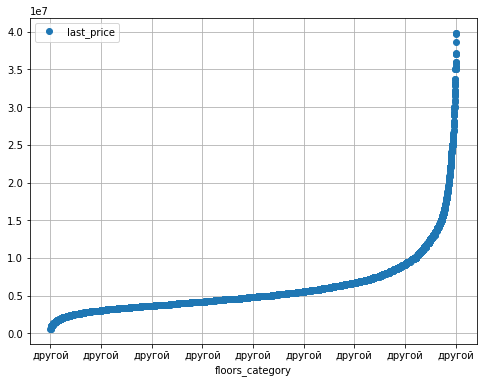

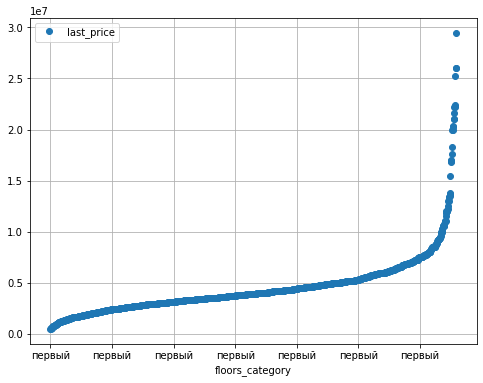

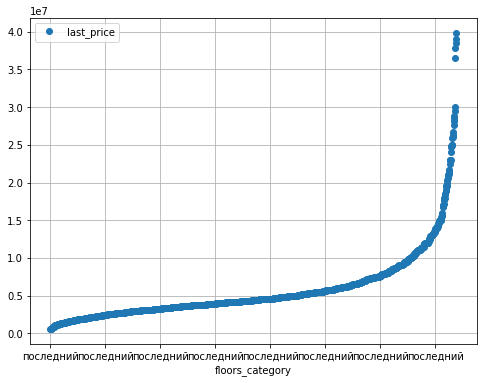

In [82]:
data_filtered1.sort_values('last_price').groupby('floors_category').plot(style='o',x='floors_category', y='last_price', grid= True, figsize=(8,6))

По данным графикам видно, что в каждой категории изменение цены происходит распределено одинаково и каких-либо отклонений ни в одной категории нет. Наблюдается плавное увеличение до 5 млн., затем цена начинает рости быстрее и после 10 млн. наблюдается резкий рост.

Сравним медианные значения стоимости квартир в каждой категории этажности. Для этого построим график зависимости медианной стоимости квартиры от этажности. 

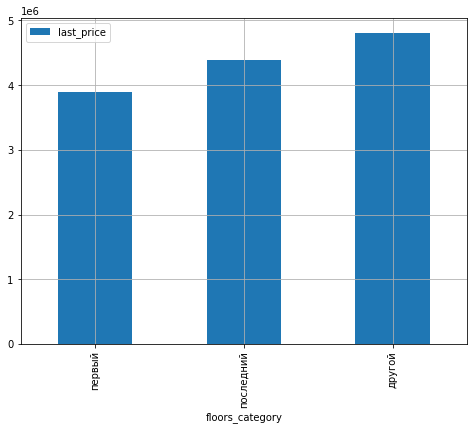

In [83]:
(data_filtered1.groupby('floors_category').agg({'last_price':'median'}).sort_values('last_price')
.plot(kind='bar', grid= True, figsize=(8,6)));

По данному графику видно, что медианная стоимость квартир на первом этаже меньше, чем у квартир на последнем и другом этажах. Самая высокая медианная стоимость у квартир на другом этаже.

In [84]:
# построим матрицу корреляции
data_filtered1.corr()

,last_price,total_area,rooms,city_сenters_nearest,weekday_exposition,month_exposition,year_exposition
last_price,1.000000,0.787752,0.502938,-0.334230,-0.014194,0.003972,-0.044020
total_area,0.787752,1.000000,0.790591,-0.225508,-0.016203,0.000448,-0.097919
rooms,0.502938,0.790591,1.000000,-0.161322,-0.007853,0.001026,-0.069931
city_сenters_nearest,-0.334230,-0.225508,-0.161322,1.000000,0.015977,-0.033783,0.016449
weekday_exposition,-0.014194,-0.016203,-0.007853,0.015977,1.000000,-0.012537,-0.002179
month_exposition,0.003972,0.000448,0.001026,-0.033783,-0.012537,1.000000,-0.259209
year_exposition,-0.044020,-0.097919,-0.069931,0.016449,-0.002179,-0.259209,1.000000


Также подтверждаются выводы сделанные на лснове графиков, что больше всего цена зависит от площади, затем от количества комнат. В этих двух случаях наблюдается прямая зависимость - при росте цены увеличиваются площадь и количество комнат. При уменьшении расстояния до центра цена растет (обратная зависимость). От дня недели, месяца и года размещения обявления стоимость квартиры практически не зависит.

### Анализ по 10 населенным пунктам 

Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.

Выведем список из 10 населённых пунктов с наибольшим числом объявлений.  

In [85]:
data_filtered['locality_name'].value_counts().head(10)

Санкт-Петербург      7525
Всеволожск            201
поселок Мурино        190
поселок Шушары        179
Колпино               171
Пушкин                166
поселок Парголово     115
Гатчина               113
Петергоф              110
деревня Кудрово       106
Name: locality_name, dtype: int64

Для расчета средней цены квдратного метра в этих 10 населеных пунктах создадим сводную таблицу, где сгруппируем данные о стоимости квадратного метра по насенным пунктам.

In [86]:
# создаем сводную таблицу
data_filtered1 = data_filtered.pivot_table(index ='locality_name', values='price_metr', aggfunc=['count', 'mean']) 
# переименовываем столбцы
data_filtered1.columns = ['count', 'mean_price_metr']
# сортируем по убыванию и выводим первые 10 строк
data_filtered1.sort_values('count', ascending = False).head(10)

,count,mean_price_metr
locality_name,,
Санкт-Петербург,7525,109692.476006
Всеволожск,201,66291.255075
поселок Мурино,190,87658.812278
поселок Шушары,179,78624.585485
Колпино,171,74827.939740
Пушкин,166,101653.365142
поселок Парголово,115,89570.355642
Гатчина,113,69935.545927
Петергоф,110,83133.000359


In [87]:
# найдем наименьшую среднюю стоимость жилья
data_filtered1.sort_values('count', ascending = False).head(10)['mean_price_metr'].min()

66291.25507516805

Наименьшая стоимость жилья среди 10 населённых пунктов с наибольшим числом объявлений составляет 66291 руб во Всеволжске.

In [88]:
# найдем наибольшую среднюю стоимость жилья
data_filtered1.sort_values('count', ascending = False).head(10)['mean_price_metr'].max()

109692.4760057058

Наибольшая стоимость жилья среди 10 населённых пунктов с наибольшим числом объявлений составляет 109692 руб в Санкт-Петербурге.

### Анализ квартир в Санкт-Петербурге

Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.

Запишем в переменную data_filtered_centr датафрейм с информацией по квартирам только в Санкт-Петербурге.

In [89]:
data_filtered_centr = data_filtered[data_filtered['locality_name'] == 'Санкт-Петербург']
data_filtered_centr.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category,price_metr,weekday_exposition,month_exposition,year_exposition,floors_category,ratio_living_area,ratio_kitchen_area
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,>65,100000.000000,1,6,2018,другой,0.320000,0.410000
9,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,False,False,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,>40,88524.590164,6,2,2017,другой,0.714754,0.106557
10,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,False,False,8.5,0.0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,>20,127525.252525,3,11,2017,другой,0.512626,0.214646
16,11,6700000.0,82.0,2017-11-23,3,3.05,5.0,55.6,1,False,False,False,9.0,0.0,Санкт-Петербург,22108.0,10698.0,3.0,420.0,0.0,NaN,397.0,>65,81707.317073,3,11,2017,первый,0.678049,0.109756
18,8,3250000.0,31.0,2017-01-27,1,2.50,5.0,19.4,2,False,False,False,5.6,1.0,Санкт-Петербург,44060.0,10842.0,1.0,759.0,0.0,NaN,168.0,>20,104838.709677,4,1,2017,другой,0.625806,0.180645
19,16,14200000.0,121.0,2019-01-09,3,2.75,16.0,76.0,8,False,False,False,12.0,0.0,Санкт-Петербург,38900.0,12843.0,0.0,NaN,0.0,NaN,97.0,>100,117355.371901,2,1,2019,другой,0.628099,0.099174
25,3,6800000.0,76.0,2015-10-01,2,2.75,23.0,39.0,18,False,False,False,15.0,2.0,Санкт-Петербург,34967.0,14640.0,0.0,NaN,1.0,564.0,300.0,>65,89473.684211,3,10,2015,другой,0.513158,0.197368
27,20,7100000.0,70.0,2017-05-12,3,2.60,17.0,49.0,11,False,False,False,9.2,0.0,Санкт-Петербург,29197.0,11456.0,2.0,452.0,1.0,779.0,151.0,>65,101428.571429,4,5,2017,другой,0.700000,0.131429
31,8,7200000.0,67.9,2017-10-26,2,2.80,16.0,38.1,4,False,False,False,13.4,2.0,Санкт-Петербург,32888.0,12944.0,0.0,NaN,0.0,NaN,112.0,>65,106038.291605,3,10,2017,другой,0.561119,0.197349
34,3,3290000.0,33.0,2018-02-04,1,2.55,16.0,14.0,3,False,False,False,8.0,0.0,Санкт-Петербург,13943.0,12739.0,0.0,NaN,0.0,NaN,15.0,>20,99696.969697,6,2,2018,другой,0.424242,0.242424


Посмотрим общую информацию по полученному датафрейму.

In [90]:
data_filtered_centr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7525 entries, 4 to 23689
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          7525 non-null   int64         
 1   last_price            7525 non-null   float64       
 2   total_area            7525 non-null   float64       
 3   first_day_exposition  7525 non-null   datetime64[ns]
 4   rooms                 7525 non-null   int64         
 5   ceiling_height        7525 non-null   float64       
 6   floors_total          7522 non-null   float64       
 7   living_area           7525 non-null   float64       
 8   floor                 7525 non-null   int64         
 9   is_apartment          7525 non-null   bool          
 10  studio                7525 non-null   bool          
 11  open_plan             7525 non-null   bool          
 12  kitchen_area          7525 non-null   float64       
 13  balcony          

Посчитаем количество пропущенных значений.

In [91]:
data_filtered_centr.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               3
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest          25
city_сenters_nearest      10
parks_around3000           0
parks_nearest           4079
ponds_around3000           0
ponds_nearest           3885
days_exposition            0
total_area_category        0
price_metr                 0
weekday_exposition         0
month_exposition           0
year_exposition            0
floors_category            0
ratio_living_area          0
ratio_kitchen_area         0
dtype: int64

В столбце содержащем информацию о расстоянии до центра присутствуют пропуски. Посчитаем какую долю от общего количества значений в датафрейме они составляют.

In [92]:
data_filtered_centr['city_сenters_nearest'].isna().sum() / len(data_filtered_centr['city_сenters_nearest'])

0.00132890365448505

Доля пропусков составляет чуть более 0,1%, можно удалить эти строки. Ведь далее необходимо рассчитать среднюю цену для каждого километра и пропущенные значения будут мешать.

In [93]:
data_filtered_centr = data_filtered_centr.dropna(subset =['city_сenters_nearest'])

In [94]:
data_filtered_centr.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               3
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest          15
city_сenters_nearest       0
parks_around3000           0
parks_nearest           4069
ponds_around3000           0
ponds_nearest           3875
days_exposition            0
total_area_category        0
price_metr                 0
weekday_exposition         0
month_exposition           0
year_exposition            0
floors_category            0
ratio_living_area          0
ratio_kitchen_area         0
dtype: int64

Пропущенных значений в данном столбце больше нет.

Создадим датафрейм который будет содержать информацию о цене, расстоянии до центра, цене за квадратный метр и общей площади. Добвим в него столбец со значение расстояния до центра в километрах.

In [95]:
data_filtered_centr1 = data_filtered_centr.loc[:, ['last_price', 'city_сenters_nearest', 'price_metr', 'total_area']]

In [96]:
data_filtered_centr1['city_сenters_km'] = round(data_filtered_centr1['city_сenters_nearest'] / 1000)
data_filtered_centr1.head(10)

,last_price,city_сenters_nearest,price_metr,total_area,city_сenters_km
4,10000000.0,8098.0,100000.000000,100.0,8.0
9,5400000.0,15008.0,88524.590164,61.0,15.0
10,5050000.0,13878.0,127525.252525,39.6,14.0
16,6700000.0,10698.0,81707.317073,82.0,11.0
18,3250000.0,10842.0,104838.709677,31.0,11.0
19,14200000.0,12843.0,117355.371901,121.0,13.0
25,6800000.0,14640.0,89473.684211,76.0,15.0
27,7100000.0,11456.0,101428.571429,70.0,11.0
31,7200000.0,12944.0,106038.291605,67.9,13.0
34,3290000.0,12739.0,99696.969697,33.0,13.0


In [97]:
# изменим тип данных в столбце с расстояниянием до центра в километрах на целочисленный
data_filtered_centr1['city_сenters_km'] = data_filtered_centr1['city_сenters_km'].astype(int)
data_filtered_centr1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7515 entries, 4 to 23689
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_price            7515 non-null   float64
 1   city_сenters_nearest  7515 non-null   float64
 2   price_metr            7515 non-null   float64
 3   total_area            7515 non-null   float64
 4   city_сenters_km       7515 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 352.3 KB


Создадим сводную таблицу со средней ценой квартиры для каждого километра.

In [98]:
data_filtered_centr1.pivot_table(index='city_сenters_km', values='last_price').head(10)

,last_price
city_сenters_km,
0,1.201636e+07
1,1.274047e+07
2,1.117220e+07
3,9.343556e+06
4,1.072386e+07
5,1.106324e+07
6,1.002439e+07
7,8.973974e+06
8,8.535991e+06


По полученным данным построим график зависимости цены квартиры от расстояния от центра.

<AxesSubplot:xlabel='city_сenters_km'>

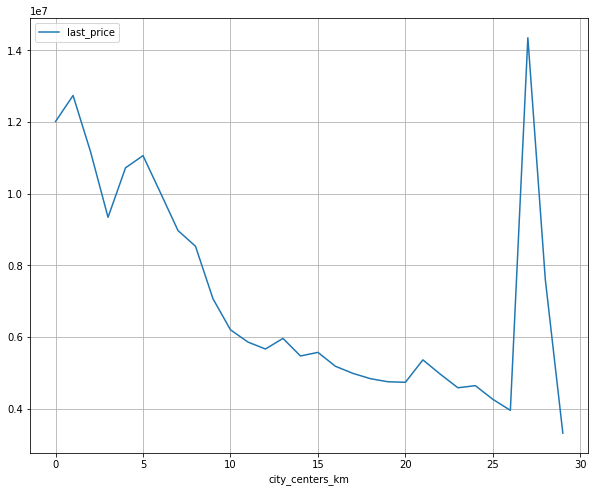

In [99]:
data_filtered_centr1.pivot_table(index='city_сenters_km', values='last_price').plot(grid=True, figsize=(10, 8))

По полученному графику видно, что с отдалением от центра средняя стоимость квартир снижается. Однако на расстоянии 27 км от центра наблюдается резкий скачок цены и далее опять снижение. Данный скачок может быть обусловлен, тем что кватртира в элитном доме или расположены рядом с достопримечательностями, а возможно владельцы плохо разбираются в рыночных ценах и написали желаемую стоимость. В любом случае динамика снижения стоимости при отдалении от центра явная, снижение цены наблюдается после 5 км, поэтому примем это расстояние за границу центральной зоны.  

###  Анализ квартир в центре Санкт-Петербурга

Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?

На основе датафрейм с информацией по квартирам только в Санкт-Петербурге data_filtered_centr проведем анализ факторов которые влияют на стоимость квартиры в центре (в пределах 5 км). Создадаим датафрейм data_filtered_centr_city который будет содержать данные о цене, площади, количестве комнат, удалённости от центра, этажности и дате размещения.

In [100]:
data_filtered_centr_city = (data_filtered_centr[data_filtered_centr['city_сenters_nearest'] <= 5000]
                            .loc[:, ['last_price', 'total_area', 'rooms', 'city_сenters_nearest',
                                     'floors_category', 'weekday_exposition', 'month_exposition', 'year_exposition']]
                           )

In [101]:
data_filtered_centr_city.head(10)

,last_price,total_area,rooms,city_сenters_nearest,floors_category,weekday_exposition,month_exposition,year_exposition
63,20000000.0,118.0,3,4800.0,другой,1,9,2018
121,33000000.0,180.0,3,4264.0,другой,4,2,2017
136,6500000.0,51.8,2,3618.0,другой,2,8,2018
137,13310800.0,85.1,2,4263.0,другой,0,1,2018
147,27700000.0,179.6,5,4489.0,последний,3,7,2017
154,8200000.0,80.0,3,3167.0,другой,1,11,2018
159,7050000.0,66.0,3,4937.0,последний,0,9,2017
239,22000000.0,119.0,3,2004.0,другой,3,2,2017
291,5900000.0,70.0,3,4132.0,первый,1,1,2017
379,21000000.0,96.0,2,2391.0,первый,1,2,2017


In [102]:
data_filtered_centr_city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 63 to 23644
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_price            871 non-null    float64
 1   total_area            871 non-null    float64
 2   rooms                 871 non-null    int64  
 3   city_сenters_nearest  871 non-null    float64
 4   floors_category       871 non-null    object 
 5   weekday_exposition    871 non-null    int64  
 6   month_exposition      871 non-null    int64  
 7   year_exposition       871 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 61.2+ KB


При помощи цикла построим графики зависимости стоимости квартиры от различных факторов.

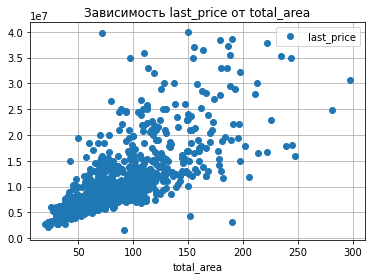

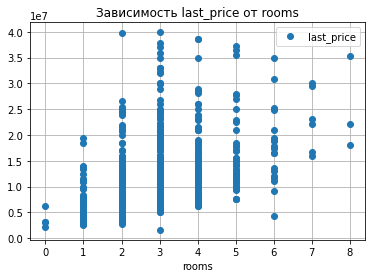

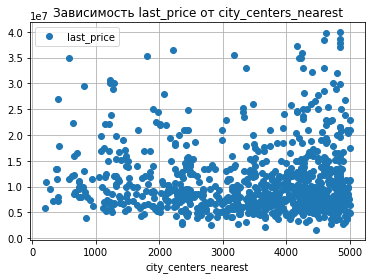

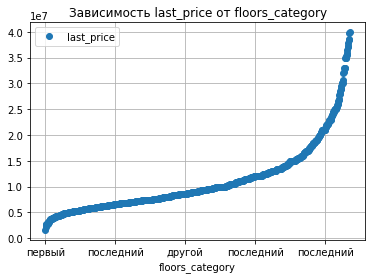

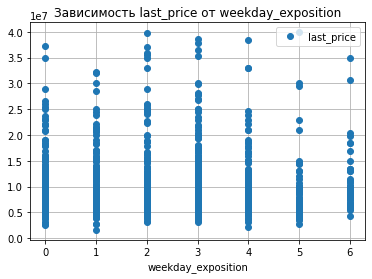

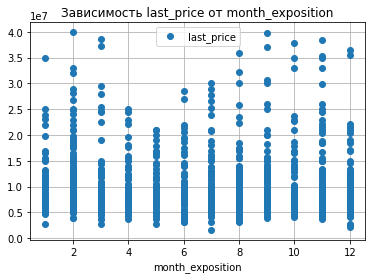

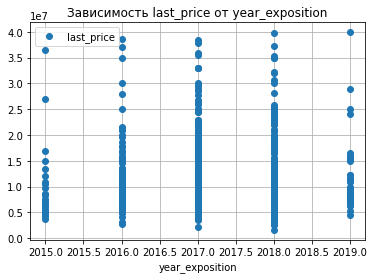

In [103]:
for arg in ['total_area', 'rooms', 'city_сenters_nearest', 'floors_category', 'weekday_exposition',
            'month_exposition', 'year_exposition']:
    (data_filtered_centr_city.sort_values('last_price')
    .plot(style='o', x=arg, y='last_price', grid= True, title=(f'Зависимость last_price от {arg}'))
    )

По получившимся графикам видно, что с увеличением площади цена растет, при маленькой площади наблюдается более строгая прямая зависимость, а с увеличением площади разброс в цене растет. С увеличением количества комнат также увеличивается стоимость, данных с количеством комнат более 4 значительно меньше стоимость их не увеличивается. Разброс по цене в зависимости от расстояния от центра наблюдается на всех 5 км. Но можно выделить, что до 1 км стоимость большинства квартир не находится в лдной ценовой категории, а по мере увеличения расстояния становится видно, что большинство квартир по прежнему состдоточено в стоимости от 5 до 10 млн. Минимальная стоитость кавртир по мере удаления от центра уменьшается. в зависимости от дня недели не сильно изменяетсяю Можно отметить, что в субботу убольшинства квартир стоимость ниже, чем в другие дни. По месяцам стоимость снижается в апреле-июне. В 2015 году большая часть объявлений была по меньшей цене, чем в последующие годы. В 2019 стоимость большинства объявлений уменьшилась, но возможно за этот год просто менбше данных, так как объявления по стоимости 2018 года присутствуют.  

Добавим графики изменения стоимости по категориям этажности.

floors_category
другой       AxesSubplot(0.125,0.125;0.775x0.755)
первый       AxesSubplot(0.125,0.125;0.775x0.755)
последний    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

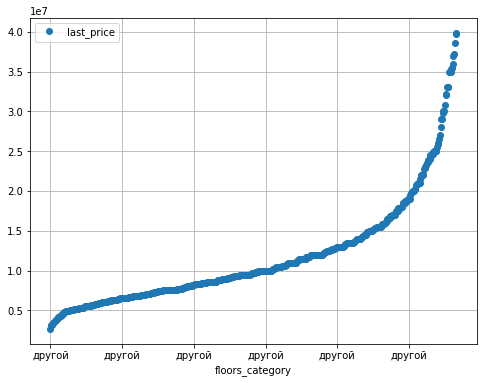

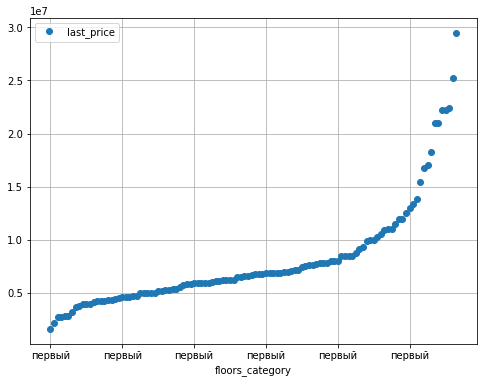

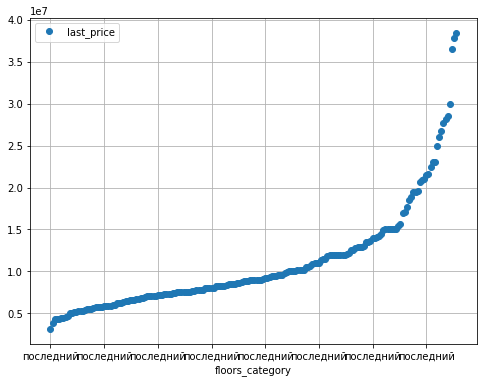

In [104]:
data_filtered_centr_city.sort_values('last_price').groupby('floors_category').plot(style='o',x='floors_category', y='last_price', grid= True, figsize=(8,6))

По данным графикам видно, что в каждой категории изменение цены происходит одинаково и каких-либо отклонений ни в одной категории нет. Наблюдается плавное увеличение до 10 млн., затем цена начинает рости быстрее. Стоимость квартир на последнем этаже плавно увеличивается до 15 млн. 

Сравним медианные значения стоимости квартир в каждой категории этажности. Для этого построим график зависимости медианной стоимости квартиры от этажности. 

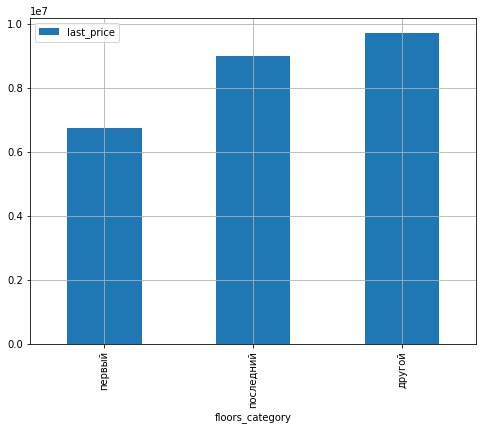

In [105]:
(data_filtered_centr_city.groupby('floors_category').agg({'last_price':'median'}).sort_values('last_price')
.plot(kind='bar', grid= True, figsize=(8,6)));

По данному графику видно, что медианная стоимость квартир на первом этаже меньше, чем у квартир на последнем и другом этажах. Самая высокая медианная стоимость у квартир на другом этаже.

In [106]:
# построим матрицу корреляции
data_filtered_centr_city.corr()

,last_price,total_area,rooms,city_сenters_nearest,weekday_exposition,month_exposition,year_exposition
last_price,1.000000,0.711434,0.432101,-0.001028,-0.022246,-0.034866,-0.031927
total_area,0.711434,1.000000,0.781040,-0.044283,-0.008873,-0.062275,-0.099521
rooms,0.432101,0.781040,1.000000,-0.082143,-0.012067,-0.056593,-0.031964
city_сenters_nearest,-0.001028,-0.044283,-0.082143,1.000000,-0.073386,-0.017260,0.034111
weekday_exposition,-0.022246,-0.008873,-0.012067,-0.073386,1.000000,0.037917,0.015992
month_exposition,-0.034866,-0.062275,-0.056593,-0.017260,0.037917,1.000000,-0.234049
year_exposition,-0.031927,-0.099521,-0.031964,0.034111,0.015992,-0.234049,1.000000


Также подтверждаются выводы сделанные на основе графиков, что больше всего цена зависит от площади, затем от количества комнат. В этих двух случаях наблюдается прямая зависимость - при росте цены увеличиваются площадь и количество комнат. При уменьшении расстояния до центра цена растет (обратная зависимость), но изменение цены в центре от удаленности от центра практически не зависит. От дня недели, месяца и года размещения обявления стоимость квартиры практически не зависит.

## Общий вывод

Был произведен анализ факторов от которых может зависеть стоимость квартир: от площади, числа комнат, удалённости от центра, этажа на котором расположена квартира: первом, последнем или другом, даты размещения: дня недели, месяца и года. 
С увеличением количества дней на которое были размещены объявления количество объявлений сокращается. Можно считать что продажи осуществились очень быстро в случае если объявление было размещено менее 45 дней, а необычно долго в случае размещения обявления более 220 дней.
После исключения выбивающихся значений по получившимся графикам на основе данных об объявления о недвижимосте в Санкт-Петербурге и Ленинградской области видно, что с увеличением площади цена растет, при маленькой площади наблюдается более строгая прямая зависимость, а с увеличением площади разброс в цене растет. С увеличением количества комнат также увеличивается стоимость. Чем ближе к центру, тем больше разброс по цене. Стоимость в зависимости от дня недели не сильно изменяется, единственное что можно заметить, что в выходные стоимость ниже. По месяцам стоимость снижается в апреле-июне. В 2015 году большая часть объявлений была по меньшей цене, чем в последующие годы. В 2019 стоимость большинства объявлений уменьшилась, но возможно за этот год просто менбше данных, так как объявления по стоимости 2018 года присутствуют.  
При построении графиков по данным об объявлениях о продаже недвижимости в центре Санкт-Петербурга наблюдаются те же зависимости: больше всего цена зависит от площади, затем от количества комнат. От дня недели, месяца и года размещения обявления стоимость квартиры практически не зависит. Отличием является то что в случае с центром города при уменьшении расстояния до центра изменение цены значительно меньше. 

Наименьшая стоимость жилья среди 10 населённых пунктов с наибольшим числом объявлений составляет 66291 руб во Всеволжске.

Наибольшая стоимость жилья среди 10 населённых пунктов с наибольшим числом объявлений составляет 109692 руб в Санкт-Петербурге.